In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

In [ ]:
parks = pd.read_csv("parks.csv")
species = pd.read_csv("species.csv")

In [3]:
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [27]:
species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [28]:
parks.shape

(56, 6)

In [29]:
species.shape

(119248, 14)

In [30]:
species.isna().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names            27147
Record Status               6
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

In [31]:
#drop unnamed column
species.drop(["Unnamed: 13"], axis=1, inplace=True)

In [32]:
species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN


In [134]:
#merge the datasets
park_species = pd.merge(species, parks, on="Park Name")
park_species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,ACAD,ME,47390,44.35,-68.21
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,ACAD,ME,47390,44.35,-68.21
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,ACAD,ME,47390,44.35,-68.21
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,ACAD,ME,47390,44.35,-68.21
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,ACAD,ME,47390,44.35,-68.21


In [48]:
print(park_species["Category"].unique())
print(" ")
print("Combien d’espèces uniques par catégorie ? ",len(park_species["Category"].unique()))

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Spider/Scorpion' 'Insect' 'Invertebrate' 'Fungi' 'Nonvascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Algae']
 
Combien d’espèces uniques par catégorie ?  14


In [50]:
print(park_species["Family"].unique())
print(" ")
print("Combien de familles uniques ? ",len(park_species["Family"].unique()))

['Cervidae' 'Canidae' 'Felidae' ... 'Pseudeurotiaceae'
 'Cunninghamellaceae' 'Saccharomycetaceae']
 
Combien de familles uniques ?  2333


In [157]:
print(park_species["Order"].unique())
print(" ")
print("Combien d'ordres scientifique uniques ? ",len(park_species["Order"].unique()))

['Artiodactyla' 'Carnivora' 'Chiroptera' 'Lagomorpha' 'Rodentia'
 'Soricomorpha' 'Accipitriformes' 'Anseriformes' 'Apodiformes'
 'Caprimulgiformes' 'Charadriiformes' 'Columbiformes' 'Coraciiformes'
 'Cuculiformes' 'Falconiformes' 'Galliformes' 'Gaviiformes' 'Gruiformes'
 'Passeriformes' 'Pelecaniformes' 'Piciformes' 'Podicipediformes'
 'Procellariiformes' 'Strigiformes' 'Suliformes' 'Squamata' 'Testudines'
 'Anura' 'Caudata' 'Anguilliformes' 'Atheriniformes' 'Clupeiformes'
 'Cypriniformes' 'Cyprinodontiformes' 'Esociformes' 'Gadiformes'
 'Gasterosteiformes' 'Osmeriformes' 'Perciformes' 'Pleuronectiformes'
 'Salmoniformes' 'Siluriformes' nan 'Acorales' 'Alismatales' 'Apiales'
 'Aquifoliales' 'Asparagales' 'Asterales' 'Boraginales' 'Brassicales'
 'Caryophyllales' 'Celastrales' 'Ceratophyllales' 'Commelinales'
 'Cornales' 'Cucurbitales' 'Dipsacales' 'Equisetales' 'Ericales' 'Fabales'
 'Fagales' 'Gentianales' 'Geraniales' 'Isoetales' 'Lamiales' 'Liliales'
 'Lycopodiales' 'Malpighiales' 'Ma

<Axes: xlabel='Count', ylabel='Category'>

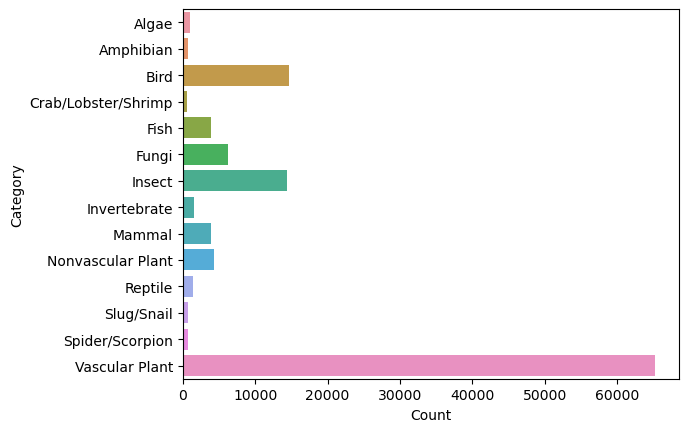

In [60]:
#Entries per category
Count = pd.DataFrame(park_species.groupby("Category").size(), columns=["Count"])
Count = Count.reset_index()
sns.barplot(y=Count["Category"], x= Count["Count"])

<Axes: xlabel='Count', ylabel='Category'>

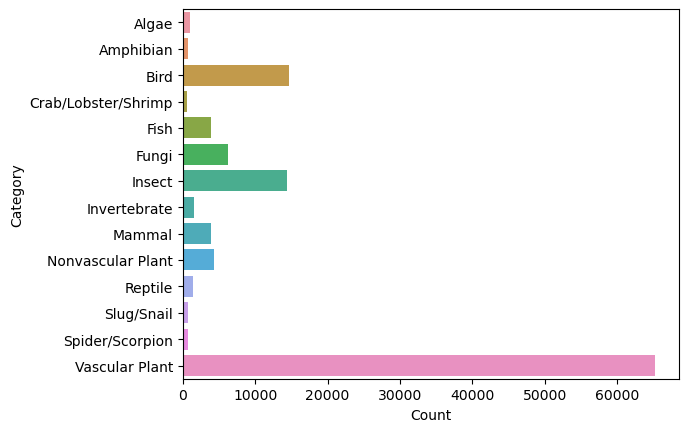

In [60]:
#Entries per category
Count = pd.DataFrame(park_species.groupby("Category").size(), columns=["Count"])
Count = Count.reset_index()
sns.barplot(y=Count["Category"], x= Count["Count"])

In [63]:
park_species['Conservation Status'].value_counts()

Conservation Status
Species of Concern     3843
Endangered              374
Under Review            194
Threatened              184
In Recovery              77
Proposed Endangered      24
Proposed Threatened       7
Breeder                   7
Resident                  5
Migratory                 2
Extinct                   1
Name: count, dtype: int64

In [159]:
park_species[park_species['Conservation Status'] == "Extinct"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
23237,CUVA-1413,Cuyahoga Valley National Park,Fish,Perciformes,Percidae,Stizostedion vitreum glaucum,Blue Pike,Approved,Not Present (False Report),Not Native,NaN,NaN,Extinct,CUVA,OH,32950,41.24,-81.55


In [65]:
park_species[park_species['Conservation Status'] == "Migratory"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
44600,GRSA-1003,Great Sand Dunes National Park and Preserve,Mammal,Artiodactyla,Cervidae,Cervus elaphus,American Elk,Wapiti,Approved,Present,Native,Rare,Migratory,GRSA,CO,42984,37.73,-105.51
44610,GRSA-1013,Great Sand Dunes National Park and Preserve,Mammal,Carnivora,Mustelidae,Mustela erminea,Ermine,Short-Tailed Weasel,Approved,Present,Native,Rare,Migratory,GRSA,CO,42984,37.73,-105.51


In [162]:
park_species[park_species['Conservation Status'] == "Endangered"]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Park Code,State,Acres,Latitude,Longitude
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,ACAD,ME,47390,44.35,-68.21
166,ACAD-1166,Acadia National Park,Bird,Charadriiformes,Scolopacidae,Numenius borealis,Eskimo Curlew,Approved,Not Confirmed,Native,NaN,Migratory,Endangered,ACAD,ME,47390,44.35,-68.21
477,ACAD-1477,Acadia National Park,Fish,Salmoniformes,Salmonidae,Salmo salar,"Atlantic Salmon, Landlocked Salmon",Approved,Present,Not Native,Uncommon,Breeder,Endangered,ACAD,ME,47390,44.35,-68.21
1779,ARCH-1070,Arches National Park,Bird,Accipitriformes,Cathartidae,Gymnogyps californianus,California Condor,Approved,Present,Native,Occasional,Vagrant,Endangered,ARCH,UT,76519,38.68,-109.57
1935,ARCH-1226,Arches National Park,Bird,Passeriformes,Tyrannidae,Empidonax traillii extimus,Southwest Willow Flycatcher,Approved,Not Confirmed,Native,NaN,NaN,Endangered,ARCH,UT,76519,38.68,-109.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117548,ZION-1096,Zion National Park,Bird,Accipitriformes,Cathartidae,Gymnogyps californianus,California Condor,Approved,Present,Native,Unknown,Vagrant,Endangered,ZION,UT,146598,37.30,-113.05
117784,ZION-1332,Zion National Park,Bird,Passeriformes,Tyrannidae,Empidonax traillii extimus,Southwestern Willow Flycatcher,Approved,Present,Native,Rare,Migratory,Endangered,ZION,UT,146598,37.30,-113.05
117875,ZION-1423,Zion National Park,Fish,Cypriniformes,Cyprinidae,Gila seminuda,Virgin River Chub,Approved,Not Confirmed,Native,NaN,NaN,Endangered,ZION,UT,146598,37.30,-113.05
117877,ZION-1425,Zion National Park,Fish,Cypriniformes,Cyprinidae,Plagopterus argentissimus,Woundfin,Approved,Not Confirmed,Native,NaN,NaN,Endangered,ZION,UT,146598,37.30,-113.05


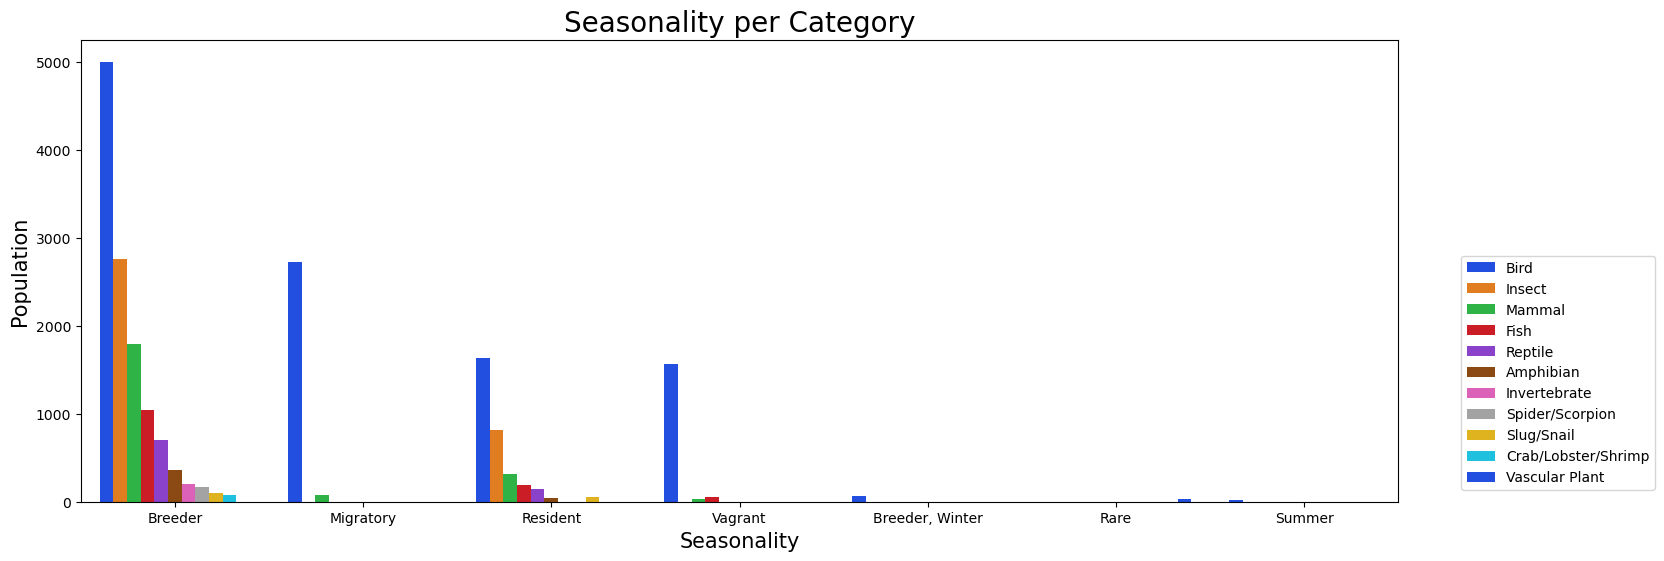

In [95]:
plt.figure(figsize=(17,6))
seasons = pd.DataFrame(park_species.groupby(["Seasonality", "Category"]).size().reset_index())
seasons.rename(columns={0:"Counts"}, inplace=True)
seasons = seasons.nlargest(25, "Counts")
sns.barplot(x="Seasonality", y="Counts", hue="Category", data=seasons, palette="bright")
plt.title("Seasonality per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Seasonality", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2,0.01))

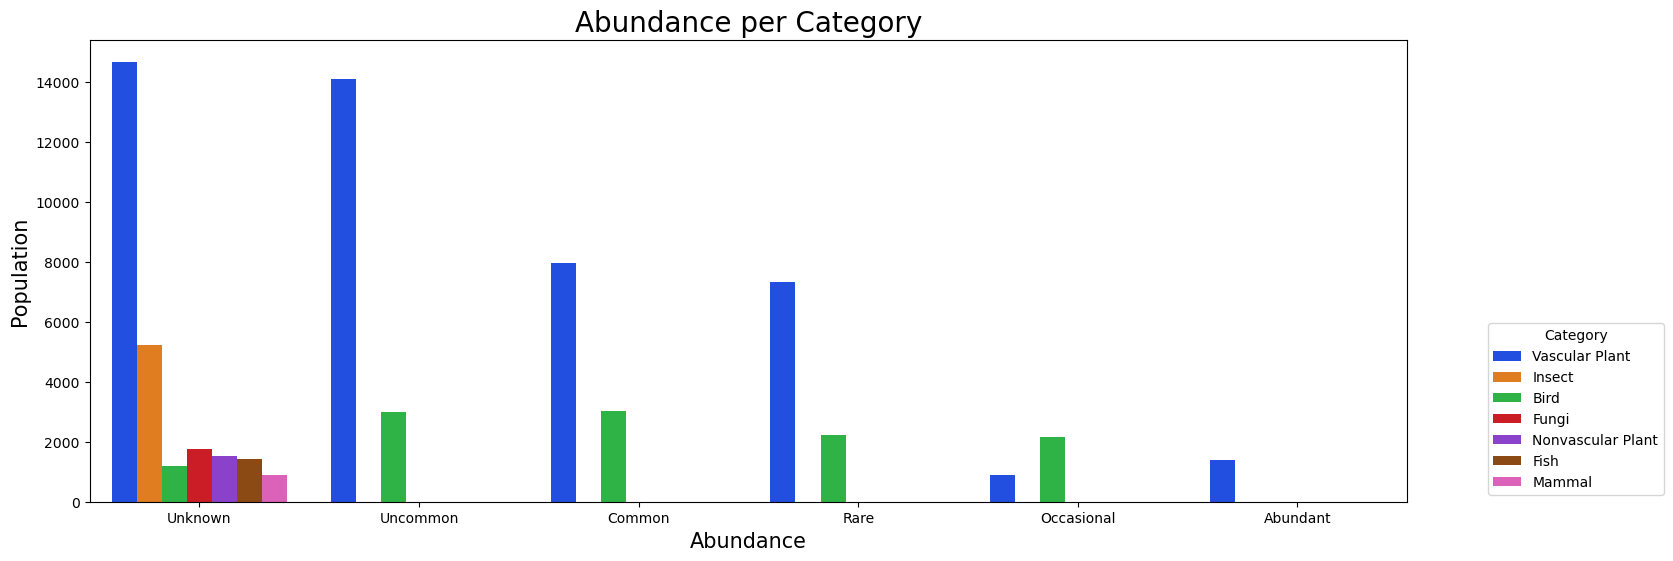

In [96]:
plt.figure(figsize=(17,6))
seasons = pd.DataFrame(park_species.groupby(["Abundance", "Category"]).size().reset_index())
seasons.rename(columns={0:"Counts"}, inplace=True)
season_smallest = seasons.nsmallest(16, "Counts")
season_biggest = seasons.nlargest(16, "Counts")
sns.barplot(x="Abundance", y="Counts", hue="Category", data=season_biggest, palette="bright", orient="v")
plt.title("Abundance per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Abundance", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title="Category")

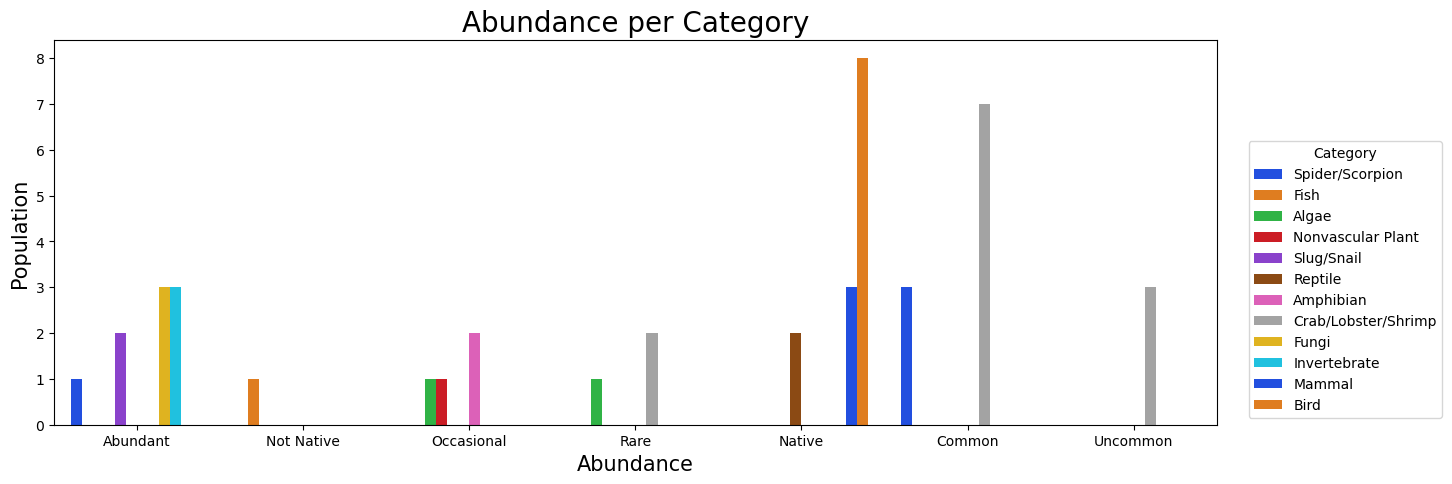

In [97]:
plt.figure(figsize=(15,5))
sns.barplot(x="Abundance", y="Counts", hue="Category", data=season_smallest, palette="bright", orient="v")
plt.title("Abundance per Category", fontsize=20)
plt.ylabel("Population", fontsize=15)
plt.xlabel("Abundance", fontsize=15)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0), title="Category")

In [135]:
#count of each conservation category in each park
conserve_count = park_species[['Park Name', 'Conservation Status']].groupby(['Park Name', 'Conservation Status']).size()
#Convert to dataframe
conserve_count_df = conserve_count.to_frame().reset_index()
conserve_count_df.columns = ['Park Name', 'Conservation Status', 'Count']

In [136]:
conserve_count_df.sample(10)

,Park Name,Conservation Status,Count
66,Cuyahoga Valley National Park,Extinct,1
163,Kenai Fjords National Park,Endangered,8
84,Dry Tortugas National Park,Under Review,2
246,Wind Cave National Park,Endangered,3
244,Voyageurs National Park,Threatened,2
119,Great Sand Dunes National Park and Preserve,Breeder,6
170,Lake Clark National Park and Preserve,Species of Concern,36
223,Saguaro National Park,Threatened,2
153,Isle Royale National Park,Under Review,2
205,Petrified Forest National Park,Species of Concern,74


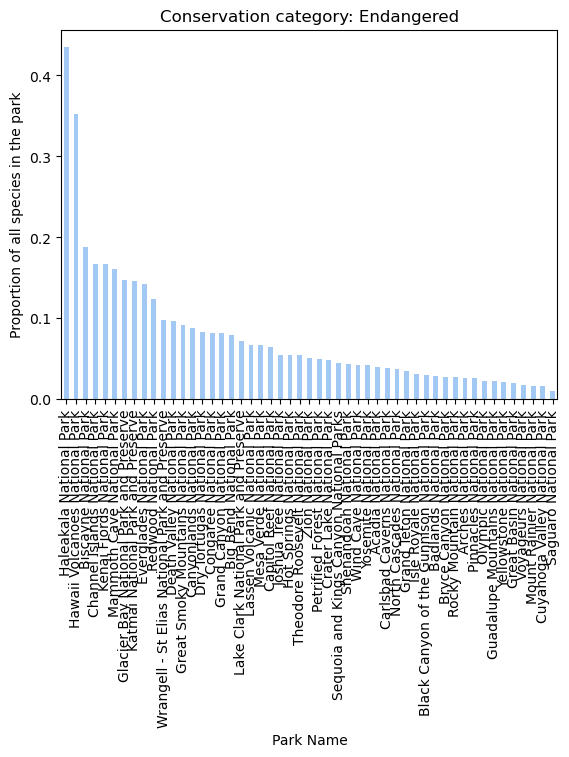

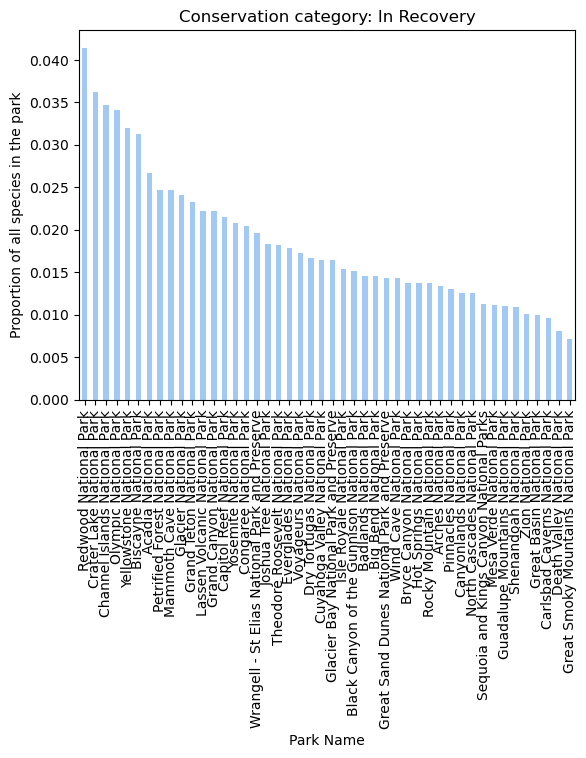

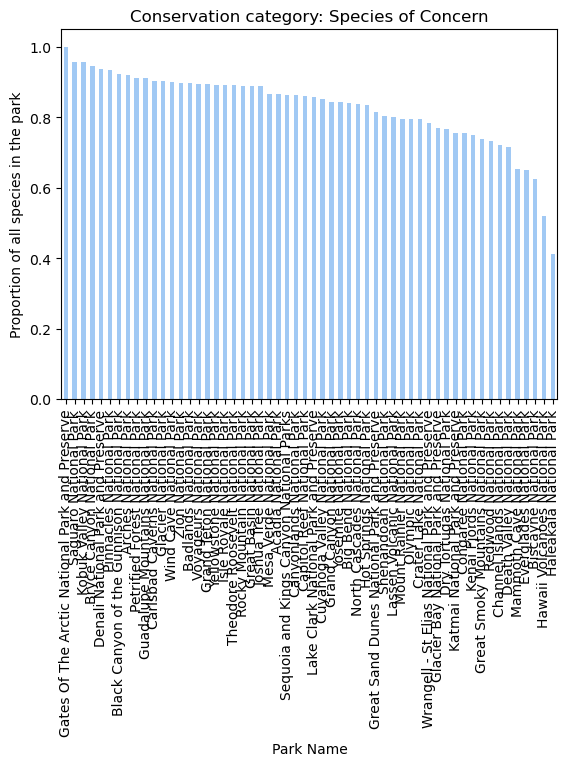

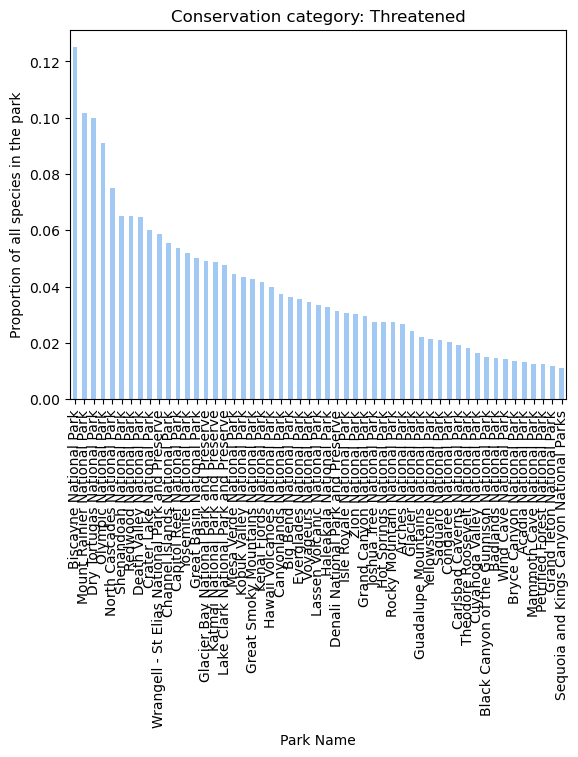

In [103]:
#plotting the proportional numbers
categories = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']

#Sum of conservation classes per park
park_sums = conserve_count_df.groupby(['Park Name']).agg('sum').reset_index()

#Create a dictionary with Park and count
park_dict = dict(zip(park_sums['Park Name'], park_sums['Count']))

#divide each conservation category count by the total count
def divide_total(row):
    return row['Count']/(park_dict[row['Park Name']])

#Create new column with proportional count
conserve_count_df['ProportionalCount'] = conserve_count_df.apply(divide_total, axis=1)

#Plot the results
for i in categories:
    subset = conserve_count_df[conserve_count_df['Conservation Status'] == i]
    subset.sort_values(by='ProportionalCount', ascending=False).plot(x='Park Name', y='ProportionalCount', kind='bar', legend=None)
    plt.ylabel('Proportion of all species in the park')
    plt.title('Conservation category: %s' % (i))
plt.show()


In [166]:
#Computing Biodiversity and Biodiversity Density
biodiversity_counts = species.groupby("Park Name")["Species ID"].count().reset_index(name='Count')
biodiversity_counts.head()

,Park Name,Count
0,Acadia National Park,1709
1,Arches National Park,1048
2,Badlands National Park,1389
3,Big Bend National Park,2269
4,Biscayne National Park,1726
5,Black Canyon of the Gunnison National Park,1106
6,Bryce Canyon National Park,1286
7,Canyonlands National Park,1223
8,Capitol Reef National Park,1566
9,Carlsbad Caverns National Park,1536


In [138]:
parks["Biodiversity Count"] = biodiversity_counts["Count"]
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Biodiversity Count
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1709
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,1048
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,1389
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,2269
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1726


In [167]:
parks["Biodiversity Density"] = parks["Biodiversity Count"]/parks["Acres"]
parks.head(10)

,Park Code,Park Name,State,Acres,Latitude,Longitude,Biodiversity Count,Biodiversity Density,text
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,1709,0.036062,Acadia National Park<br>47390 Acres<br>1709 Sp...
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,1048,0.013696,Arches National Park<br>76519 Acres<br>1048 Sp...
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,1389,0.005722,Badlands National Park<br>242756 Acres<br>1389...
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,2269,0.002832,Big Bend National Park<br>801163 Acres<br>2269...
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,1726,0.009981,Biscayne National Park<br>172924 Acres<br>1726...
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72,1106,0.033566,Black Canyon of the Gunnison National Park<br>...
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18,1286,0.035887,Bryce Canyon National Park<br>35835 Acres<br>1...
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93,1223,0.003623,Canyonlands National Park<br>337598 Acres<br>1...
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17,1566,0.006474,Capitol Reef National Park<br>241904 Acres<br>...
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44,1536,0.032844,Carlsbad Caverns National Park<br>46766 Acres<...


In [163]:
parks[["Acres", "Biodiversity Count", "Biodiversity Density"]].describe()

,Acres,Biodiversity Count,Biodiversity Density
count,5.600000e+01,56.000000,56.000000
mean,9.279291e+05,2129.428571,0.023990
std,1.709258e+06,1202.955192,0.049589
min,5.550000e+03,848.000000,0.000180
25%,6.901050e+04,1380.000000,0.002066
50%,2.387645e+05,1815.500000,0.009551
75%,8.173602e+05,2365.500000,0.026097
max,8.323148e+06,6623.000000,0.351351


In [140]:
parks['text'] = parks['Park Name'] + '<br>' + \
    (parks['Acres']).astype(str) + ' Acres' + '<br>' + \
    (parks['Biodiversity Count']).astype(str)+' Species'

In [141]:
scale = 8000

In [168]:
fig = go.Figure()

#for index, row in geo_parks.iterrows():
fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = parks['Longitude'],
    lat = parks['Latitude'],
    text = parks['text'],
    marker = dict(
        size = parks['Acres']/scale,
        color = parks['Biodiversity Count'],
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemode = 'area',
        colorscale = 'inferno',
        cmax = parks['Biodiversity Count'].max(),
        cmin = parks['Biodiversity Count'].min(),
        colorbar = {'title': 'Nombre d\'espèce'}
        )))


fig.update_layout(
        title_text = 'Taille et biodiversité des parcs',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()


In [169]:
fig = go.Figure()
scale = 8000

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = parks['Longitude'],
    lat = parks['Latitude'],
    text = parks['text'],
    marker = dict(
        size = parks['Biodiversity Density']*scale,
        color = parks['Biodiversity Density'],
        line_color='rgb(50,50,50)',
        line_width=1,
        sizemode = 'area',
        colorscale = 'inferno',
        colorbar = {'title': 'Densité de la biodiversité'}
        )))


fig.update_layout(
        title_text = 'Densité de la biodiversité des parcs',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()